In [4]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]='/Users/phillliprashaad/Google_API_Key.json'

In [5]:
import bq_helper
from bq_helper import BigQueryHelper
# https://www.kaggle.com/sohier/introduction-to-the-bq-helper-package
medicare = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                   dataset_name="cms_medicare")

In [6]:
bq_assistant = BigQueryHelper("bigquery-public-data", "cms_medicare")


In [7]:
#The code below list all the tables contained in this database. There are 23 tables
bq_assistant.list_tables()

['home_health_agencies_2013',
 'home_health_agencies_2014',
 'hospice_providers_2014',
 'hospital_general_info',
 'inpatient_charges_2011',
 'inpatient_charges_2012',
 'inpatient_charges_2013',
 'inpatient_charges_2014',
 'inpatient_charges_2015',
 'nursing_facilities_2013',
 'nursing_facilities_2014',
 'outpatient_charges_2011',
 'outpatient_charges_2012',
 'outpatient_charges_2013',
 'outpatient_charges_2014',
 'outpatient_charges_2015',
 'part_d_prescriber_2014',
 'physicians_and_other_supplier_2012',
 'physicians_and_other_supplier_2013',
 'physicians_and_other_supplier_2014',
 'physicians_and_other_supplier_2015',
 'referring_durable_medical_equip_2013',
 'referring_durable_medical_equip_2014']

In [8]:
#I wanted to look at the 'part_d_prescriber_2014' table schema to get a better understand of the table layout
bq_assistant.table_schema('part_d_prescriber_2014')

,name,type,mode,description
0,npi,STRING,REQUIRED,National Provider Identifier
1,nppes_provider_last_org_name,STRING,NULLABLE,Last Name/Organization Name of the Provider
2,nppes_provider_first_name,STRING,NULLABLE,First Name of the Provider
3,nppes_provider_city,STRING,NULLABLE,City of the Provider
4,nppes_provider_state,STRING,NULLABLE,State Code of the Provider
5,specialty_description,STRING,NULLABLE,Provider Specialty Type
6,description_flag,STRING,NULLABLE,Source of Provider Specialty
7,drug_name,STRING,REQUIRED,Name of the drug
8,generic_name,STRING,NULLABLE,Generic name of the drug
9,bene_count,INTEGER,NULLABLE,Number of Medicare Beneficiaries


In [9]:
#I am looking at the first 15 records of table 'part_d_prescriber_2014' in a Pandas DataFrame
bq_assistant.head('part_d_prescriber_2014', num_rows=15)

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,...,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_day_supply_ge65,total_drug_cost_ge65,total_30_day_fill_count,total_30_day_fill_count_ge65
0,1003002817,IGLESIAS,NAYVIS,DORAL,FL,Family Practice,S,CILOSTAZOL,CILOSTAZOL,14.0,...,4020,1428.25,NaN,#,110,None,3450,1278.20,134.0,115.0
1,1003009218,NOLEN,JAMES,MORRILTON,AR,Family Practice,S,LORAZEPAM,LORAZEPAM,26.0,...,2900,827.61,14.0,None,56,None,1250,464.61,116.1,56.1
2,1003013756,PHUNG,ANDY,LENOIR,NC,Family Practice,S,ALLOPURINOL,ALLOPURINOL,14.0,...,3540,707.65,NaN,*,42,None,2280,399.14,118.0,76.0
3,1003034851,GUST,AMY,SEVIERVILLE,TN,Family Practice,S,ALLOPURINOL,ALLOPURINOL,21.0,...,4844,849.56,NaN,#,84,None,3944,662.59,162.0,132.0
4,1003070723,BEARD,MARK,SOUTHFIELD,MI,Family Practice,S,HYDROCODONE-ACETAMINOPHEN,HYDROCODONE/ACETAMINOPHEN,65.0,...,6654,6399.23,36.0,None,147,None,3273,3046.12,275.2,149.1
5,1003096587,IRIARTE,MANRIQUE,PEMBROKE PINES,FL,Internal Medicine,S,GLIPIZIDE XL,GLIPIZIDE,NaN,...,1303,513.84,NaN,*,41,None,1303,513.84,43.4,43.4
6,1003243544,MCDONNELL,KATHRYN,POUGHKEEPSIE,NY,Nurse Practitioner,S,GABAPENTIN,GABAPENTIN,23.0,...,2244,966.51,NaN,#,39,None,1224,532.80,75.0,41.0
7,1003803321,TURNER,KENNETH,RUSSELLVILLE,AR,Family Practice,S,MELOXICAM,MELOXICAM,42.0,...,6689,1042.49,NaN,#,136,None,4460,660.38,235.0,160.0
8,1003803552,TOWNE,WILLIAM,GENEVA,IL,Cardiology,S,SIMVASTATIN,SIMVASTATIN,13.0,...,2550,502.81,13.0,None,39,None,2550,502.81,85.0,85.0
9,1003806621,DESANTOLA,JOSEPH,HENDERSONVILLE,NC,Internal Medicine,S,AMLODIPINE BESYLATE,AMLODIPINE BESYLATE,30.0,...,6305,798.13,NaN,#,88,None,4985,643.78,211.0,167.0


In [10]:
#What states has the most overall prescriptions?
#Assumption: States with larger populations will have more prescriptions

query1 = """SELECT
  nppes_provider_state AS state,
  ROUND(SUM(total_claim_count) / 1e6) AS total_claim_count_millions
FROM
  `bigquery-public-data.cms_medicare.part_d_prescriber_2014`
GROUP BY
  state
ORDER BY
  total_claim_count_millions DESC
;
        """
response1 = medicare.query_to_pandas_safe(query1)
response1.head(51)

,state,total_claim_count_millions
0,CA,116.0
1,FL,91.0
2,NY,80.0
3,TX,76.0
4,PA,63.0
5,OH,53.0
6,NC,46.0
7,IL,43.0
8,MI,39.0
9,GA,39.0


In [11]:
#Set python variable equal to query
max_presc_by_state = response1.head(51).copy()

In [12]:
max_presc_by_state.set_index('state', inplace=True)

In [13]:
max_presc_by_state

,total_claim_count_millions
state,
CA,116.0
FL,91.0
NY,80.0
TX,76.0
PA,63.0
OH,53.0
NC,46.0
IL,43.0
MI,39.0


In [14]:
#Now lets plot our results

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

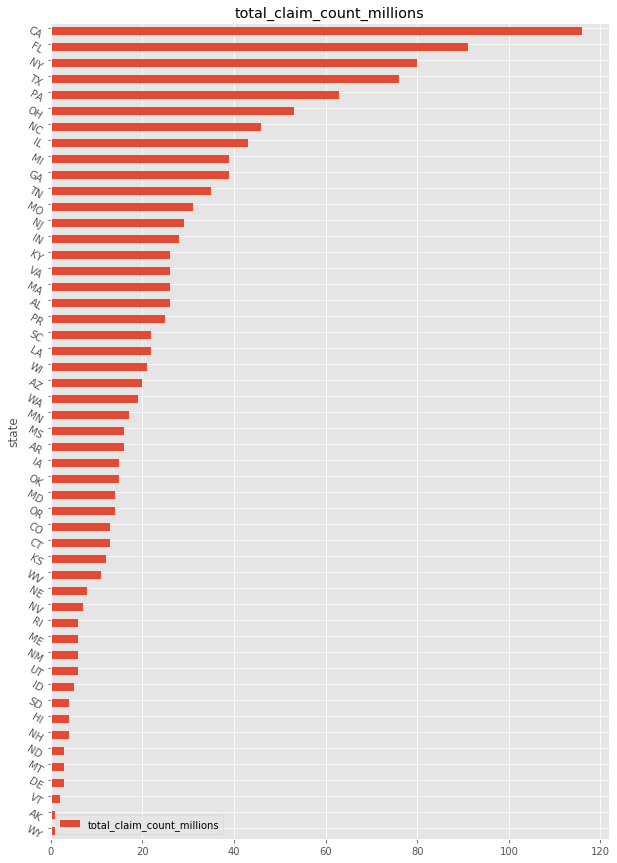

In [15]:
max_presc_by_state.sort_values('total_claim_count_millions',inplace=True)
max_presc_by_state.plot.barh(rot=-30, subplots=True,figsize =(10,15), position=.9 );

In [16]:
#How many distinct medications are in this table?

RXquery = """SELECT COUNT (DISTINCT drug_name) AS distinct_drugs
FROM `bigquery-public-data.cms_medicare.part_d_prescriber_2014`

        """
response3 = medicare.query_to_pandas_safe(RXquery, max_gb_scanned=10)
response3.head(51)

,distinct_drugs
0,2703


In [17]:
#STOP PLACE
#What is the most prescribed medication in each state?

query2 = """SELECT
  A.state,
  drug_name,
  total_claim_count,
  day_supply,
  ROUND(total_cost_millions) AS total_cost_millions
FROM (
  SELECT
    generic_name AS drug_name,
    nppes_provider_state AS state,
    ROUND(SUM(total_claim_count)) AS total_claim_count,
    ROUND(SUM(total_day_supply)) AS day_supply,
    ROUND(SUM(total_drug_cost)) / 1e6 AS total_cost_millions
  FROM
    `bigquery-public-data.cms_medicare.part_d_prescriber_2014`
  GROUP BY
    state,
    drug_name) A
INNER JOIN (
  SELECT
    state,
    MAX(total_claim_count) AS max_total_claim_count
  FROM (
    SELECT
      nppes_provider_state AS state,
      ROUND(SUM(total_claim_count)) AS total_claim_count
    FROM
      `bigquery-public-data.cms_medicare.part_d_prescriber_2014`
    GROUP BY
      state,
      generic_name)
  GROUP BY
    state) B
ON
  A.state = B.state
  AND A.total_claim_count = B.max_total_claim_count
ORDER BY
  A.total_claim_count DESC
;
        """
response2 = medicare.query_to_pandas_safe(query2, max_gb_scanned=10)
response2.head(51)

,state,drug_name,total_claim_count,day_supply,total_cost_millions
0,CA,LEVOTHYROXINE SODIUM,3844722.0,211726348.0,78.0
1,FL,LEVOTHYROXINE SODIUM,2982449.0,163379911.0,64.0
2,TX,HYDROCODONE/ACETAMINOPHEN,2833795.0,60404796.0,63.0
3,NY,AMLODIPINE BESYLATE,2609790.0,123221634.0,21.0
4,PA,LEVOTHYROXINE SODIUM,2353753.0,109162406.0,44.0
5,OH,LEVOTHYROXINE SODIUM,1813810.0,93494247.0,32.0
6,MI,HYDROCODONE/ACETAMINOPHEN,1792522.0,39885683.0,40.0
7,NC,LEVOTHYROXINE SODIUM,1513777.0,68617909.0,30.0
8,IL,LEVOTHYROXINE SODIUM,1457499.0,74227568.0,28.0
9,TN,HYDROCODONE/ACETAMINOPHEN,1377467.0,29083360.0,24.0


In [18]:
#Added query to python variable
Most_Prescribed_DF = response2.head(51).copy()

In [19]:
#Reduce the column value by showing in millions
Most_Prescribed_DF["total_claim_count"] = round(Most_Prescribed_DF["total_claim_count"]/1000000 , 2)

In [20]:
#Reduce the column value by showingin millions
Most_Prescribed_DF["day_supply"] = round(Most_Prescribed_DF["day_supply"]/1000000, 2)

In [21]:
Most_Prescribed_DF

,state,drug_name,total_claim_count,day_supply,total_cost_millions
0,CA,LEVOTHYROXINE SODIUM,3.84,211.73,78.0
1,FL,LEVOTHYROXINE SODIUM,2.98,163.38,64.0
2,TX,HYDROCODONE/ACETAMINOPHEN,2.83,60.40,63.0
3,NY,AMLODIPINE BESYLATE,2.61,123.22,21.0
4,PA,LEVOTHYROXINE SODIUM,2.35,109.16,44.0
5,OH,LEVOTHYROXINE SODIUM,1.81,93.49,32.0
6,MI,HYDROCODONE/ACETAMINOPHEN,1.79,39.89,40.0
7,NC,LEVOTHYROXINE SODIUM,1.51,68.62,30.0
8,IL,LEVOTHYROXINE SODIUM,1.46,74.23,28.0
9,TN,HYDROCODONE/ACETAMINOPHEN,1.38,29.08,24.0


In [22]:
#I noticed alot of the same drugs appeared frequently, so I decided to group them and get the sum.
#LEVOTHYROXINE SODIUM a Hyper Thyroid medication appeared the most with the greatest cost
Most_Prescribed_DF.groupby('drug_name').sum().sort_values(by=['total_claim_count'],ascending = False)

,total_claim_count,day_supply,total_cost_millions
drug_name,,,
LEVOTHYROXINE SODIUM,22.63,1160.69,449.0
HYDROCODONE/ACETAMINOPHEN,13.28,285.54,264.0
LISINOPRIL,4.60,249.28,36.0
AMLODIPINE BESYLATE,3.96,180.99,32.0
ATORVASTATIN CALCIUM,0.62,35.13,19.0


In [23]:
Group_Most_Presc_DF = Most_Prescribed_DF.groupby('drug_name').sum().sort_values(by=['total_claim_count'],ascending = False)

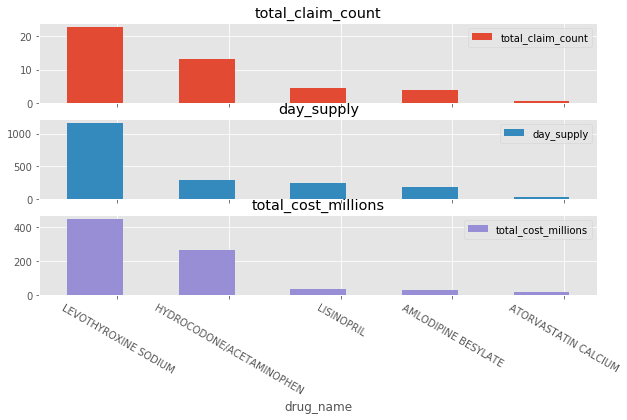

In [24]:
Group_Most_Presc_DF.plot.bar(rot=-30, subplots=True,figsize =(10,5), position=.9 );

In [25]:
#What are the top 5 medications prescribed in each state?



ST5query = ''' SELECT * FROM (SELECT nppes_provider_state AS state,
                                generic_name AS drug_name,
                                sum(total_claim_count),
                                RANK () OVER (PARTITION BY nppes_provider_state ORDER BY sum(total_claim_count) DESC) AS row_rank
                                FROM `bigquery-public-data.cms_medicare.part_d_prescriber_2014`
                                GROUP BY nppes_provider_state, drug_name
                                ORDER BY sum(total_claim_count) DESC
                                )
                WHERE row_rank <= 5
                ORDER BY state'''

responseST5 = medicare.query_to_pandas_safe(ST5query, max_gb_scanned=10)
responseST5.head(350)

,state,drug_name,f0_,row_rank
0,AA,AMOXICILLIN,225,1
1,AA,HYDROCODONE/ACETAMINOPHEN,180,2
2,AA,IBUPROFEN,155,3
3,AA,AZITHROMYCIN,78,4
4,AA,METHYLPREDNISOLONE,71,5
...,...,...,...,...
300,ZZ,HYDROCODONE/ACETAMINOPHEN,2232,1
301,ZZ,AMLODIPINE BESYLATE,1076,2
302,ZZ,LISINOPRIL,1046,3
303,ZZ,SIMVASTATIN,1041,4


In [26]:
#Assign state top 5 query to python variable
state_top5_df = responseST5.head(350).copy()

In [27]:
#Rename column "f0_" to 'total_claims_count'
state_top5_df.rename(columns={'f0_':'total_claims_count'}, inplace=True)

In [28]:
state_top5_df

,state,drug_name,total_claims_count,row_rank
0,AA,AMOXICILLIN,225,1
1,AA,HYDROCODONE/ACETAMINOPHEN,180,2
2,AA,IBUPROFEN,155,3
3,AA,AZITHROMYCIN,78,4
4,AA,METHYLPREDNISOLONE,71,5
...,...,...,...,...
300,ZZ,HYDROCODONE/ACETAMINOPHEN,2232,1
301,ZZ,AMLODIPINE BESYLATE,1076,2
302,ZZ,LISINOPRIL,1046,3
303,ZZ,SIMVASTATIN,1041,4


In [29]:
#The data contains records for 61 states instead of 50. NOT SURE WHY.
state_top5_df['state'].unique()

array(['AA', 'AE', 'AK', 'AL', 'AP', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT',
       'DC', 'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT',
       'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR',
       'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT',
       'WA', 'WI', 'WV', 'WY', 'XX', 'ZZ'], dtype=object)

In [30]:
#What is each drugs average rank
state_top5_df.groupby('drug_name')['drug_name',"row_rank"].mean().sort_values(by=["row_rank"])

,row_rank
drug_name,
LEVOTHYROXINE SODIUM,1.943396
HYDROCODONE/ACETAMINOPHEN,1.966667
AMOXICILLIN,2.000000
LISINOPRIL,2.622642
CHLORHEXIDINE GLUCONATE,3.000000
FINASTERIDE,3.000000
METFORMIN HCL,3.000000
LOSARTAN/HYDROCHLOROTHIAZIDE,3.000000
AMLODIPINE BESYLATE,3.111111


In [31]:
#How frequent does each drug appear in a top 5?
state_top5_df.groupby('drug_name')['drug_name'].count().sort_values(ascending=False)

drug_name
LEVOTHYROXINE SODIUM            53
LISINOPRIL                      53
OMEPRAZOLE                      38
AMLODIPINE BESYLATE             36
SIMVASTATIN                     36
HYDROCODONE/ACETAMINOPHEN       30
ATORVASTATIN CALCIUM            24
FUROSEMIDE                       7
METFORMIN HCL                    5
AMOXICILLIN                      3
LOSARTAN POTASSIUM               3
FINASTERIDE                      2
IBUPROFEN                        2
GABAPENTIN                       1
AZITHROMYCIN                     1
CHLORHEXIDINE GLUCONATE          1
TAMSULOSIN HCL                   1
HYDROCHLOROTHIAZIDE              1
LOSARTAN/HYDROCHLOROTHIAZIDE     1
METHYLPREDNISOLONE               1
METOPROLOL SUCCINATE             1
METOPROLOL TARTRATE              1
NAPROXEN                         1
NIFEDIPINE                       1
PRAVASTATIN SODIUM               1
ALPRAZOLAM                       1
Name: drug_name, dtype: int64

In [32]:
#What is CA top 5 prescribed drugs
state_top5_df[state_top5_df['state'] =="CA"]

,state,drug_name,total_claims_count,row_rank
40,CA,LEVOTHYROXINE SODIUM,3844722,1
41,CA,HYDROCODONE/ACETAMINOPHEN,3740106,2
42,CA,AMLODIPINE BESYLATE,3728200,3
43,CA,ATORVASTATIN CALCIUM,3678833,4
44,CA,SIMVASTATIN,3392175,5


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a192d1d90>],
      dtype=object)

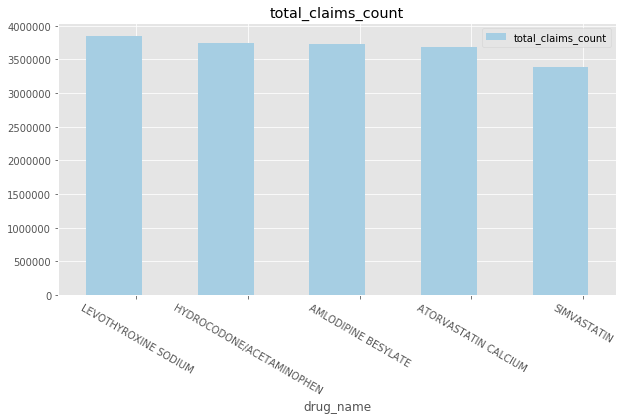

In [33]:
#Lets graph it!
state_top5_df[state_top5_df['state'] =="CA"].set_index('drug_name').plot.bar(y='total_claims_count',
                                                                             rot=-30, subplots=True,figsize =(10,5), 
                                                                             position=.9, stacked=True,
                                                                            colormap='Paired')

In [34]:
#What is ALABAMA top 5 prescribed drugs
state_top5_df[state_top5_df['state'] =="AL"]

,state,drug_name,total_claims_count,row_rank
15,AL,HYDROCODONE/ACETAMINOPHEN,1214392,1
16,AL,OMEPRAZOLE,762739,2
17,AL,LEVOTHYROXINE SODIUM,733869,3
18,AL,AMLODIPINE BESYLATE,708626,4
19,AL,LISINOPRIL,608947,5


In [35]:
#Write max prescriptions table to csv file
#max_presc_by_state.to_csv('/Users/phillliprashaad/Documents/states.csv')

In [36]:
#Write state_top5_df to csv file
#state_top5_df.to_csv('/Users/phillliprashaad/Desktop/Galvanzie_DSI/Capstone_1/Health Care/import_tables/state_top5.csv')

In [37]:
#Import population data into dataframe
pop_df = pd.read_csv('/Users/phillliprashaad/Desktop/Galvanzie_DSI/Capstone_1/Health Care/import_tables/region_pop_2.csv')

In [38]:
pop_df

,SUMLEV,REGION_dig,REGION_name,DIVISION_dig,DIVISION_name,STATE_dig,STATE_abb,NAME,CENSUS2010POP,ESTIMATESBASE2010,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,10,0.0,ALL,0.0,NON DIVISION,0,NaN,United States,308745538,308758105,...,0.000000,2.493773,2.682083,2.636187,2.921500,3.260435,3.252788,2.871957,2.153911,1.818059
1,20,1.0,Northeast,0.0,NON DIVISION,0,NaN,Northeast Region,55317240,55318443,...,-5.254530,0.887909,-0.038355,-0.469783,-0.986097,-2.061965,-2.490484,-1.837048,-2.134447,-2.859713
2,20,2.0,Midwest,0.0,NON DIVISION,0,NaN,Midwest Region,66927001,66929725,...,-2.365881,-0.963930,-0.973943,-0.006924,-0.762969,-1.388437,-1.241784,-0.557370,-0.922755,-1.111173
3,20,3.0,South,0.0,NON DIVISION,0,NaN,South Region,114555744,114563030,...,3.261349,5.130513,5.850458,5.292073,6.161501,7.277358,7.150074,6.198168,5.225519,5.203720
4,20,4.0,West,0.0,NON DIVISION,0,NaN,West Region,71945553,71946907,...,0.614245,2.723344,3.062896,3.162262,4.026429,4.987285,5.261078,4.021194,3.044951,2.312083
5,40,3.0,South,6.0,East South Central,1,AL,Alabama,4779736,4780125,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
6,40,4.0,West,9.0,Pacific,2,AK,Alaska,710231,710249,...,-12.929847,0.587728,1.416798,-0.955359,-11.460949,-7.997118,-3.897349,-10.992765,-13.859140,-12.031221
7,40,4.0,West,8.0,Mountain,4,AZ,Arizona,6392017,6392288,...,12.609078,4.278167,6.899802,6.376679,9.168478,9.597577,11.964782,10.878879,12.962934,13.687161
8,40,3.0,South,7.0,West South Central,5,AR,Arkansas,2915918,2916031,...,0.834503,3.294766,0.827785,0.057853,-0.091449,1.075446,1.486269,2.009593,0.958896,0.923429
9,40,4.0,West,9.0,Pacific,6,CA,California,37253956,37254519,...,-5.151429,1.276797,1.495016,1.649031,2.203551,1.984957,0.500044,-0.629909,-2.130954,-3.276681


In [39]:
#The medication data is from 2014 so I want to look at the population data from the same year

pop_2014_df = pop_df[['REGION_name','DIVISION_name','STATE_abb','NAME', 'POPESTIMATE2014','NPOPCHG_2014', 'BIRTHS2014']].copy()

In [40]:
#Scale columns in table by dividing 1m. It makes plot look cleaner.
pop_2014_df[['POPESTIMATE2014','NPOPCHG_2014','BIRTHS2014' ]] /= 1e6

In [41]:
#Round to the 3rd decimal place
pop_2014_df.round(3)

,REGION_name,DIVISION_name,STATE_abb,NAME,POPESTIMATE2014,NPOPCHG_2014,BIRTHS2014
0,ALL,NON DIVISION,NaN,United States,318.301,2.307,3.963
1,Northeast,NON DIVISION,NaN,Northeast Region,56.006,0.104,0.632
2,Midwest,NON DIVISION,NaN,Midwest Region,67.745,0.185,0.837
3,South,NON DIVISION,NaN,South Region,119.624,1.260,1.525
4,West,NON DIVISION,NaN,West Region,74.926,0.759,0.969
5,South,East South Central,AL,Alabama,4.842,0.012,0.059
6,West,Pacific,AK,Alaska,0.736,-0.001,0.011
7,West,Mountain,AZ,Arizona,6.730,0.098,0.086
8,South,West South Central,AR,Arkansas,2.967,0.008,0.038
9,West,Pacific,CA,California,38.597,0.336,0.499


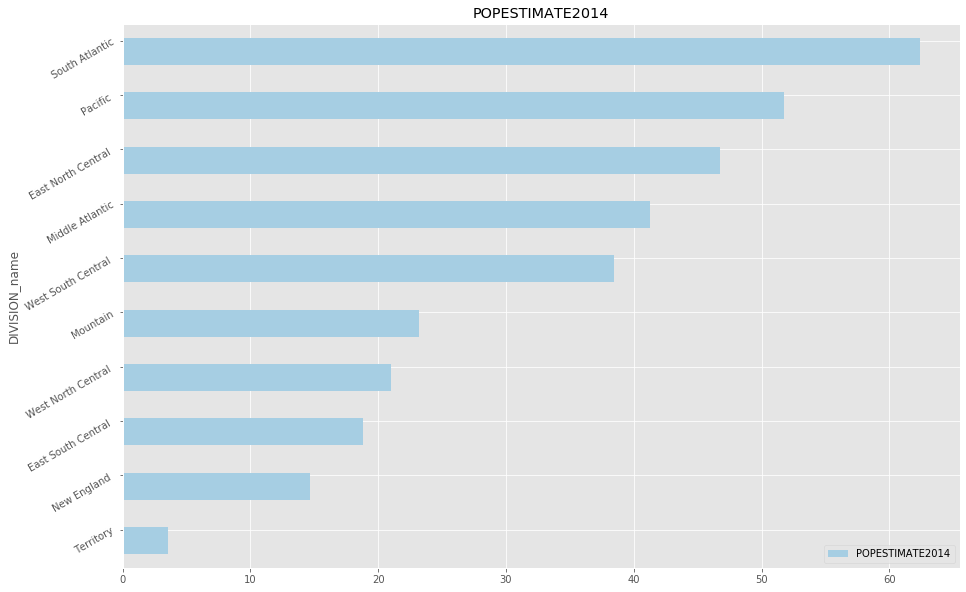

In [42]:
#Create a dataframe that groups and sums the population by Division

division_2014_df = pop_2014_df[pop_2014_df['DIVISION_name']!='NON DIVISION'].groupby('DIVISION_name').sum().round(3).sort_values(by='POPESTIMATE2014')

division_2014_df.plot.barh(y='POPESTIMATE2014',rot=30, subplots=True,figsize =(15,10), position=.9, stacked=True,colormap='Paired');

In [43]:
division_2014_df.describe()

,POPESTIMATE2014,NPOPCHG_2014,BIRTHS2014
count,10.000000,10.00000,10.000000
mean,32.183600,0.22500,0.400000
std,18.687823,0.24625,0.232933
min,3.535000,-0.05800,0.036000
25%,19.336750,0.06100,0.244000
50%,30.807000,0.09250,0.395000
75%,45.397500,0.42625,0.559000
max,62.382000,0.65300,0.742000


In [44]:
#Now lets merge State top 5 table with the 2014 population table

joined_df_merge = state_top5_df.merge(pop_2014_df, how='left', 
                                         left_on='state', 
                                         right_on='STATE_abb',
                                         suffixes=('','_region'))


In [45]:
#Scale total_claims_count column values
joined_df_merge['total_claims_count'] /= 1e6

In [46]:
joined_df_merge[joined_df_merge['state']=='AL']

,state,drug_name,total_claims_count,row_rank,REGION_name,DIVISION_name,STATE_abb,NAME,POPESTIMATE2014,NPOPCHG_2014,BIRTHS2014
15,AL,HYDROCODONE/ACETAMINOPHEN,1.214392,1,South,East South Central,AL,Alabama,4.841799,0.011718,0.058903
16,AL,OMEPRAZOLE,0.762739,2,South,East South Central,AL,Alabama,4.841799,0.011718,0.058903
17,AL,LEVOTHYROXINE SODIUM,0.733869,3,South,East South Central,AL,Alabama,4.841799,0.011718,0.058903
18,AL,AMLODIPINE BESYLATE,0.708626,4,South,East South Central,AL,Alabama,4.841799,0.011718,0.058903
19,AL,LISINOPRIL,0.608947,5,South,East South Central,AL,Alabama,4.841799,0.011718,0.058903


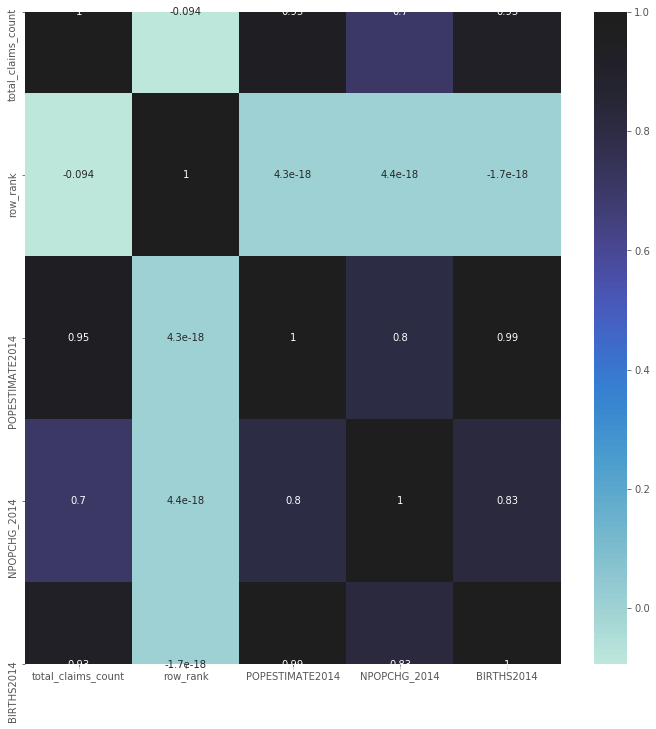

In [47]:
#Heatmap shows the correlations between variables. 
#There is a very high correlation between population size and total claims count
plt.subplots(figsize=(12,12))
sns.heatmap(joined_df_merge.corr(), annot=True, center=1);

In [48]:
joined_df_merge.columns

Index(['state', 'drug_name', 'total_claims_count', 'row_rank', 'REGION_name',
       'DIVISION_name', 'STATE_abb', 'NAME', 'POPESTIMATE2014', 'NPOPCHG_2014',
       'BIRTHS2014'],
      dtype='object')

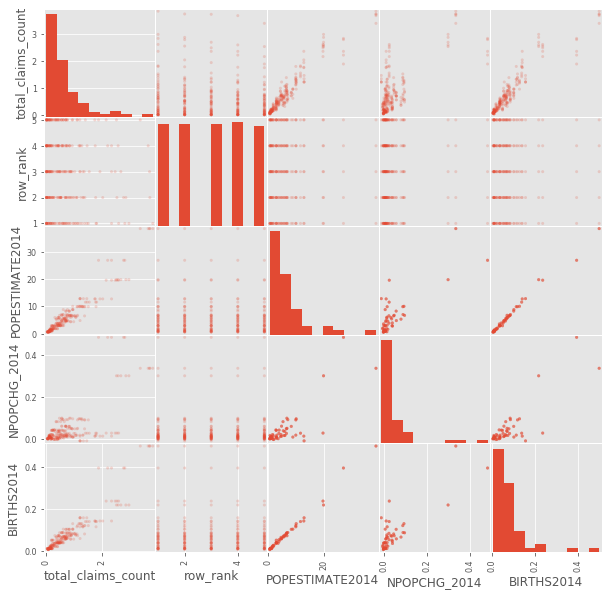

In [51]:
pd.plotting.scatter_matrix(joined_df_merge, alpha=0.2, figsize=(10,10), diagonal='hist');

/Users/phillliprashaad/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/phillliprashaad/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


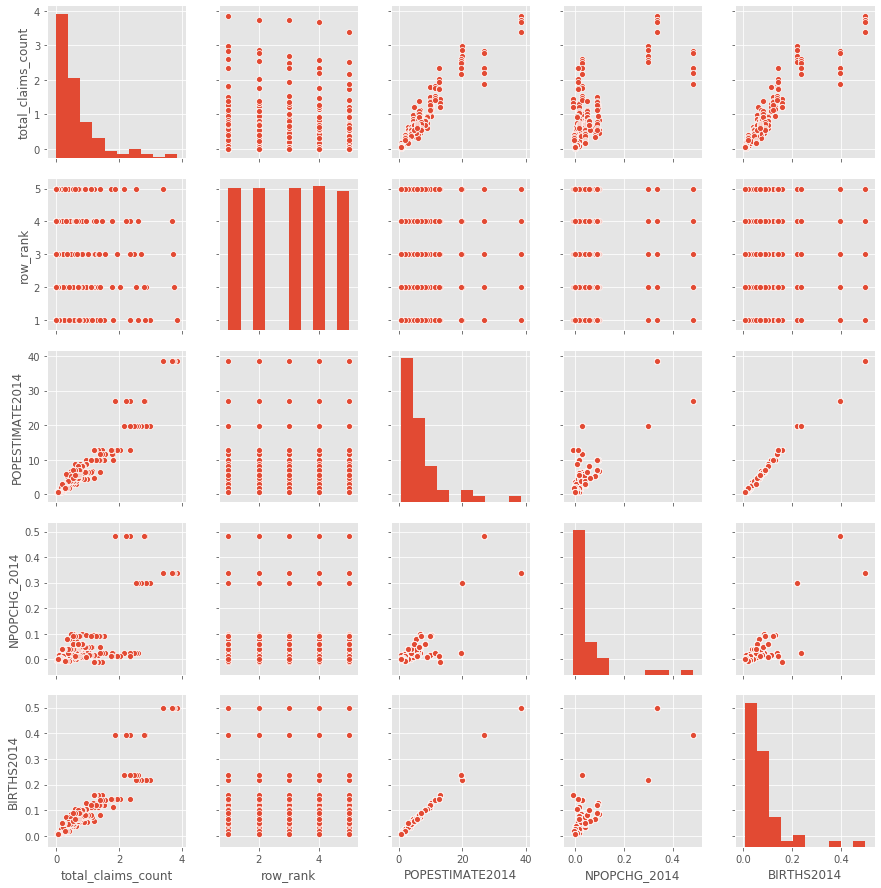

In [53]:
sns.pairplot(joined_df_merge)

In [54]:
#Create a helper function to more efficiently merge tables
def left_df_merge(df1, df2, col1, col2 ):
    df_merge = df1.merge(df2, how='left', 
                                         left_on=col1, 
                                         right_on=col2)
    return df_merge

In [60]:
#Import demographics table
demog_df = pd.read_csv('/Users/phillliprashaad/Desktop/Galvanzie_DSI/Capstone_1/Where_Are_The_Drugs/import_tables/demographic_by_state.csv')

In [62]:
demog_df.head()

,Year.id,Year.display-label,Sex.id,Sex.display-label,Hisp.id,Hisp.display-label,GEO.id,GEO.id2,state.name,state.abb,totpop,white,black,native.american,asian,pacific.islander,multi.racial
0,cen42010,"April 1, 2010 Census",female,Female,hisp,Hispanic,0100000US,NaN,United States,NON STATE,24858794,21936806,1191984,702309,249346,85203,693146
1,cen42010,"April 1, 2010 Census",female,Female,nhisp,Not Hispanic,0100000US,NaN,United States,NON STATE,132105418,100301335,19853611,1147502,7691693,246518,2864759
2,cen42010,"April 1, 2010 Census",female,Female,tothisp,Total,0100000US,NaN,United States,NON STATE,156964212,122238141,21045595,1849811,7941039,331721,3557905
3,cen42010,"April 1, 2010 Census",male,Male,hisp,Hispanic,0100000US,NaN,United States,NON STATE,25618800,22681299,1136129,773939,248654,92206,686573
4,cen42010,"April 1, 2010 Census",male,Male,nhisp,Not Hispanic,0100000US,NaN,United States,NON STATE,126162526,97017621,18068911,1115756,6969823,250698,2739717


In [68]:
#I want to understand the datatypes in this table
demog_df.dtypes

Year.id                object
Year.display-label     object
Sex.id                 object
Sex.display-label      object
Hisp.id                object
Hisp.display-label     object
GEO.id                 object
GEO.id2               float64
state.name             object
state.abb              object
totpop                  int64
white                   int64
black                   int64
native.american         int64
asian                   int64
pacific.islander        int64
multi.racial            int64
dtype: object

In [80]:
#Create a helper function that searches a specific column to see if it contains a given value.
#The function will return a filtered dataframe.

def filter_DF(df, colname, string):
    mask = df[colname].str.contains(string)
    return df[mask]

In [82]:
#I only want 2014 related data
demog_2014_df = filter_DF(demog_df,'Year.id','2014' )

In [84]:
demog_2014_df.head()

,Year.id,Year.display-label,Sex.id,Sex.display-label,Hisp.id,Hisp.display-label,GEO.id,GEO.id2,state.name,state.abb,totpop,white,black,native.american,asian,pacific.islander,multi.racial
54,est72014,1-Jul-14,female,Female,hisp,Hispanic,0100000US,NaN,United States,NON STATE,27284006,24009944,1334064,766306,275323,93771,804598
55,est72014,1-Jul-14,female,Female,nhisp,Not Hispanic,0100000US,NaN,United States,NON STATE,134404773,100322874,20632934,1192216,8747300,269703,3239746
56,est72014,1-Jul-14,female,Female,tothisp,Total,0100000US,NaN,United States,NON STATE,161688779,124332818,21966998,1958522,9022623,363474,4044344
57,est72014,1-Jul-14,male,Male,hisp,Hispanic,0100000US,NaN,United States,NON STATE,27891023,24598581,1281554,836323,273725,101020,799820
58,est72014,1-Jul-14,male,Male,nhisp,Not Hispanic,0100000US,NaN,United States,NON STATE,128806619,97441991,18864320,1158643,7936111,273849,3131705


In [89]:
#I am combining the already joined 2014 table with the 2014 demographics table
consol_2014_df = left_df_merge(joined_df_merge, demog_2014_df, 'state', 'state.abb' )


In [90]:
consol_2014_df

,state,drug_name,total_claims_count,row_rank,REGION_name,DIVISION_name,STATE_abb,NAME,POPESTIMATE2014,NPOPCHG_2014,...,GEO.id2,state.name,state.abb,totpop,white,black,native.american,asian,pacific.islander,multi.racial
0,AA,AMOXICILLIN,0.000225,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AA,HYDROCODONE/ACETAMINOPHEN,0.000180,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AA,IBUPROFEN,0.000155,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AA,AZITHROMYCIN,0.000078,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AA,METHYLPREDNISOLONE,0.000071,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300,ZZ,HYDROCODONE/ACETAMINOPHEN,0.002232,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2301,ZZ,AMLODIPINE BESYLATE,0.001076,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2302,ZZ,LISINOPRIL,0.001046,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2303,ZZ,SIMVASTATIN,0.001041,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
CA_consol_df = filter_DF(consol_2014_df,'state','CA' )

In [99]:
CA_consol_df.columns

Index(['state', 'drug_name', 'total_claims_count', 'row_rank', 'REGION_name',
       'DIVISION_name', 'STATE_abb', 'NAME', 'POPESTIMATE2014', 'NPOPCHG_2014',
       'BIRTHS2014', 'Year.id', 'Year.display-label', 'Sex.id',
       'Sex.display-label', 'Hisp.id', 'Hisp.display-label', 'GEO.id',
       'GEO.id2', 'state.name', 'state.abb', 'totpop', 'white', 'black',
       'native.american', 'asian', 'pacific.islander', 'multi.racial'],
      dtype='object')

In [106]:
#Choose the columns I am interested in
CA_consol_df[['state','drug_name','total_claims_count','REGION_name','DIVISION_name',
              'Sex.display-label','Hisp.display-label','black','white','asian','pacific.islander',
             'native.american','multi.racial']].head()

,state,drug_name,total_claims_count,REGION_name,DIVISION_name,Sex.display-label,Hisp.display-label,black,white,asian,pacific.islander,native.american,multi.racial
200,CA,LEVOTHYROXINE SODIUM,3.844722,West,Pacific,Female,Hispanic,160908.0,6644794.0,117172.0,25567.0,228912.0,210839.0
201,CA,LEVOTHYROXINE SODIUM,3.844722,West,Pacific,Female,Not Hispanic,1115656.0,7472860.0,2798459.0,71223.0,83419.0,511881.0
202,CA,LEVOTHYROXINE SODIUM,3.844722,West,Pacific,Female,Total,1276564.0,14117654.0,2915631.0,96790.0,312331.0,722720.0
203,CA,LEVOTHYROXINE SODIUM,3.844722,West,Pacific,Male,Hispanic,153799.0,6736286.0,115065.0,25840.0,241506.0,209507.0
204,CA,LEVOTHYROXINE SODIUM,3.844722,West,Pacific,Male,Not Hispanic,1093244.0,7442322.0,2515648.0,69698.0,81687.0,498847.0


In [107]:
#Assign parsed dataframe into python variable
CA2_consol_df = CA_consol_df[['state','drug_name','total_claims_count','REGION_name','DIVISION_name',
              'Sex.display-label','Hisp.display-label','black','white','asian','pacific.islander',
             'native.american','multi.racial']]

In [109]:
CA2_consol_df.head()

,state,drug_name,total_claims_count,REGION_name,DIVISION_name,Sex.display-label,Hisp.display-label,black,white,asian,pacific.islander,native.american,multi.racial
200,CA,LEVOTHYROXINE SODIUM,3.844722,West,Pacific,Female,Hispanic,160908.0,6644794.0,117172.0,25567.0,228912.0,210839.0
201,CA,LEVOTHYROXINE SODIUM,3.844722,West,Pacific,Female,Not Hispanic,1115656.0,7472860.0,2798459.0,71223.0,83419.0,511881.0
202,CA,LEVOTHYROXINE SODIUM,3.844722,West,Pacific,Female,Total,1276564.0,14117654.0,2915631.0,96790.0,312331.0,722720.0
203,CA,LEVOTHYROXINE SODIUM,3.844722,West,Pacific,Male,Hispanic,153799.0,6736286.0,115065.0,25840.0,241506.0,209507.0
204,CA,LEVOTHYROXINE SODIUM,3.844722,West,Pacific,Male,Not Hispanic,1093244.0,7442322.0,2515648.0,69698.0,81687.0,498847.0


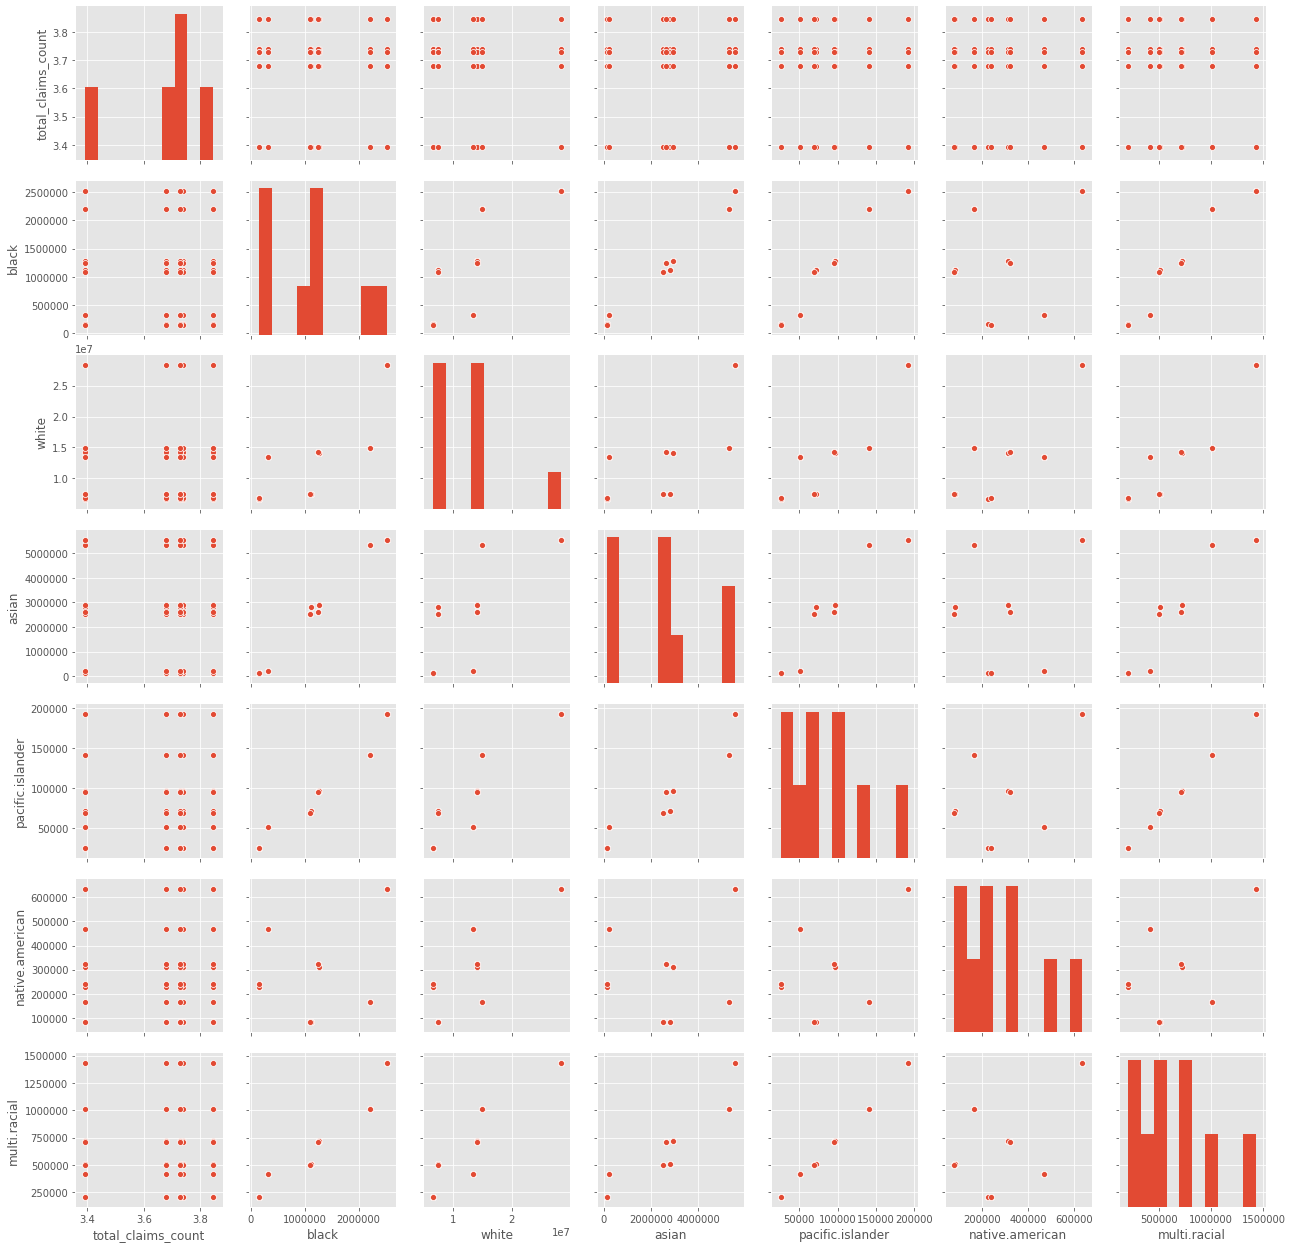

In [110]:
#This isnt really showing me any significant correlations
sns.pairplot(CA2_consol_df)

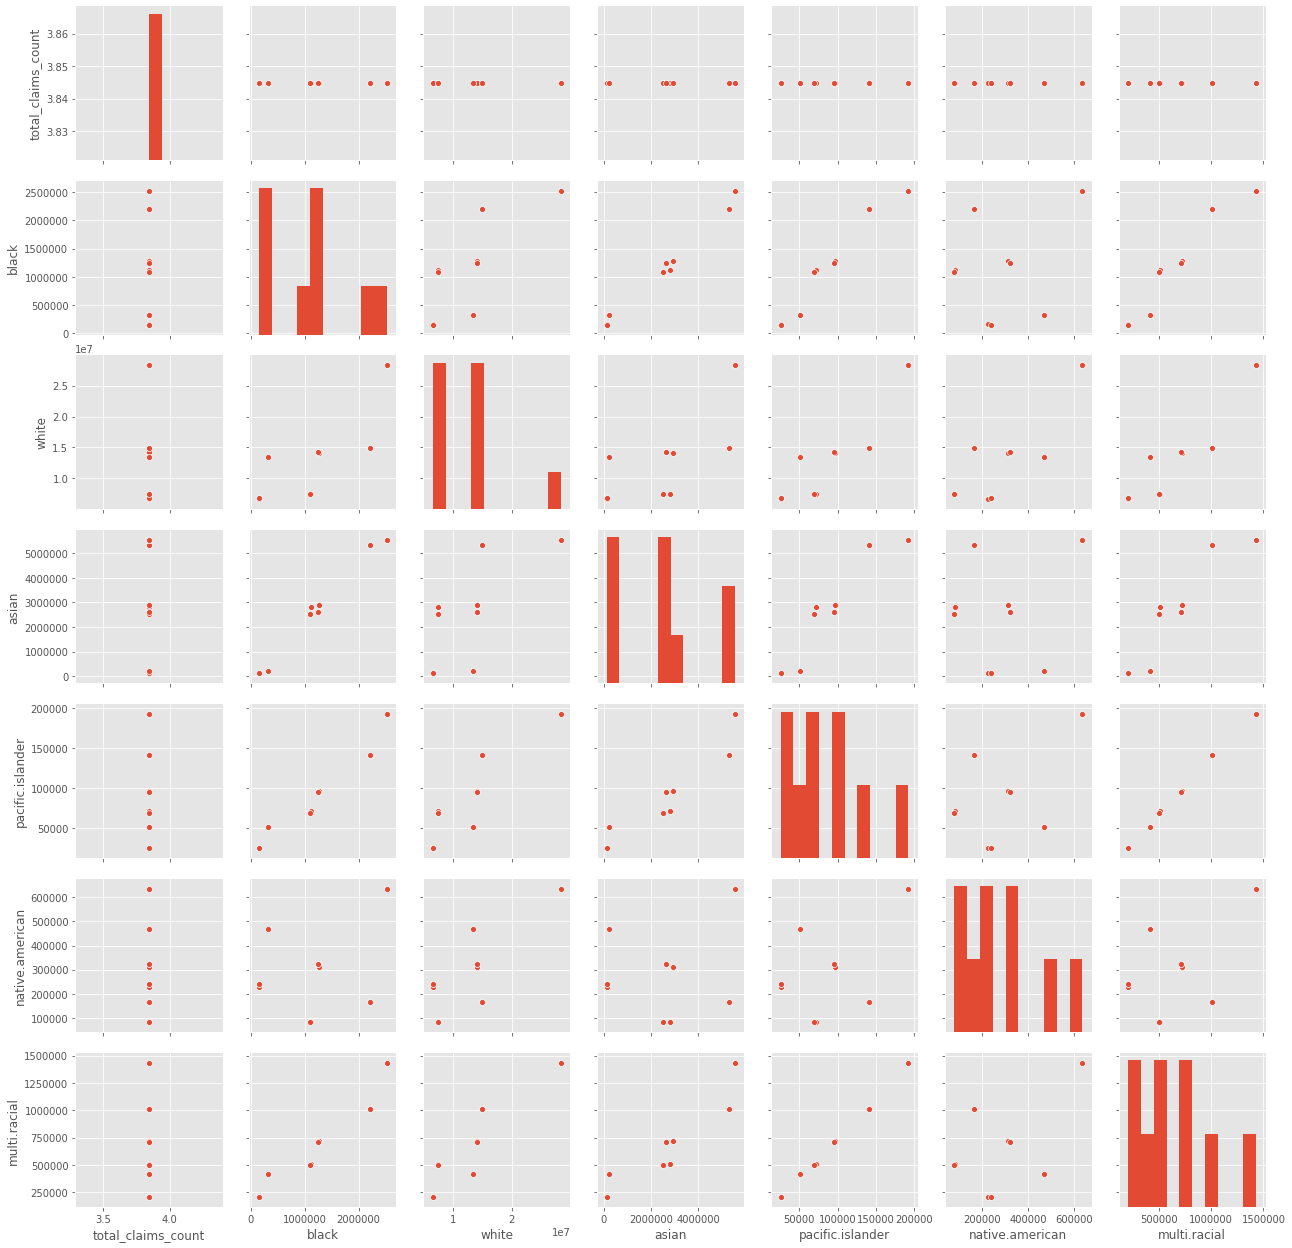

In [115]:
#I wonder what happens if I filter on only LEVOTHYROXINE SODIUM
#Still not alot of correlation
sns.pairplot(filter_DF(CA2_consol_df,'drug_name','LEVOTHYROXINE SODIUM' ))

In [113]:
#Import Clean and consolidated data
clean_consol_2014_df = pd.read_csv('/Users/phillliprashaad/Desktop/Galvanzie_DSI/Capstone_1/Where_Are_The_Drugs/import_tables/consol_2014_table.csv')

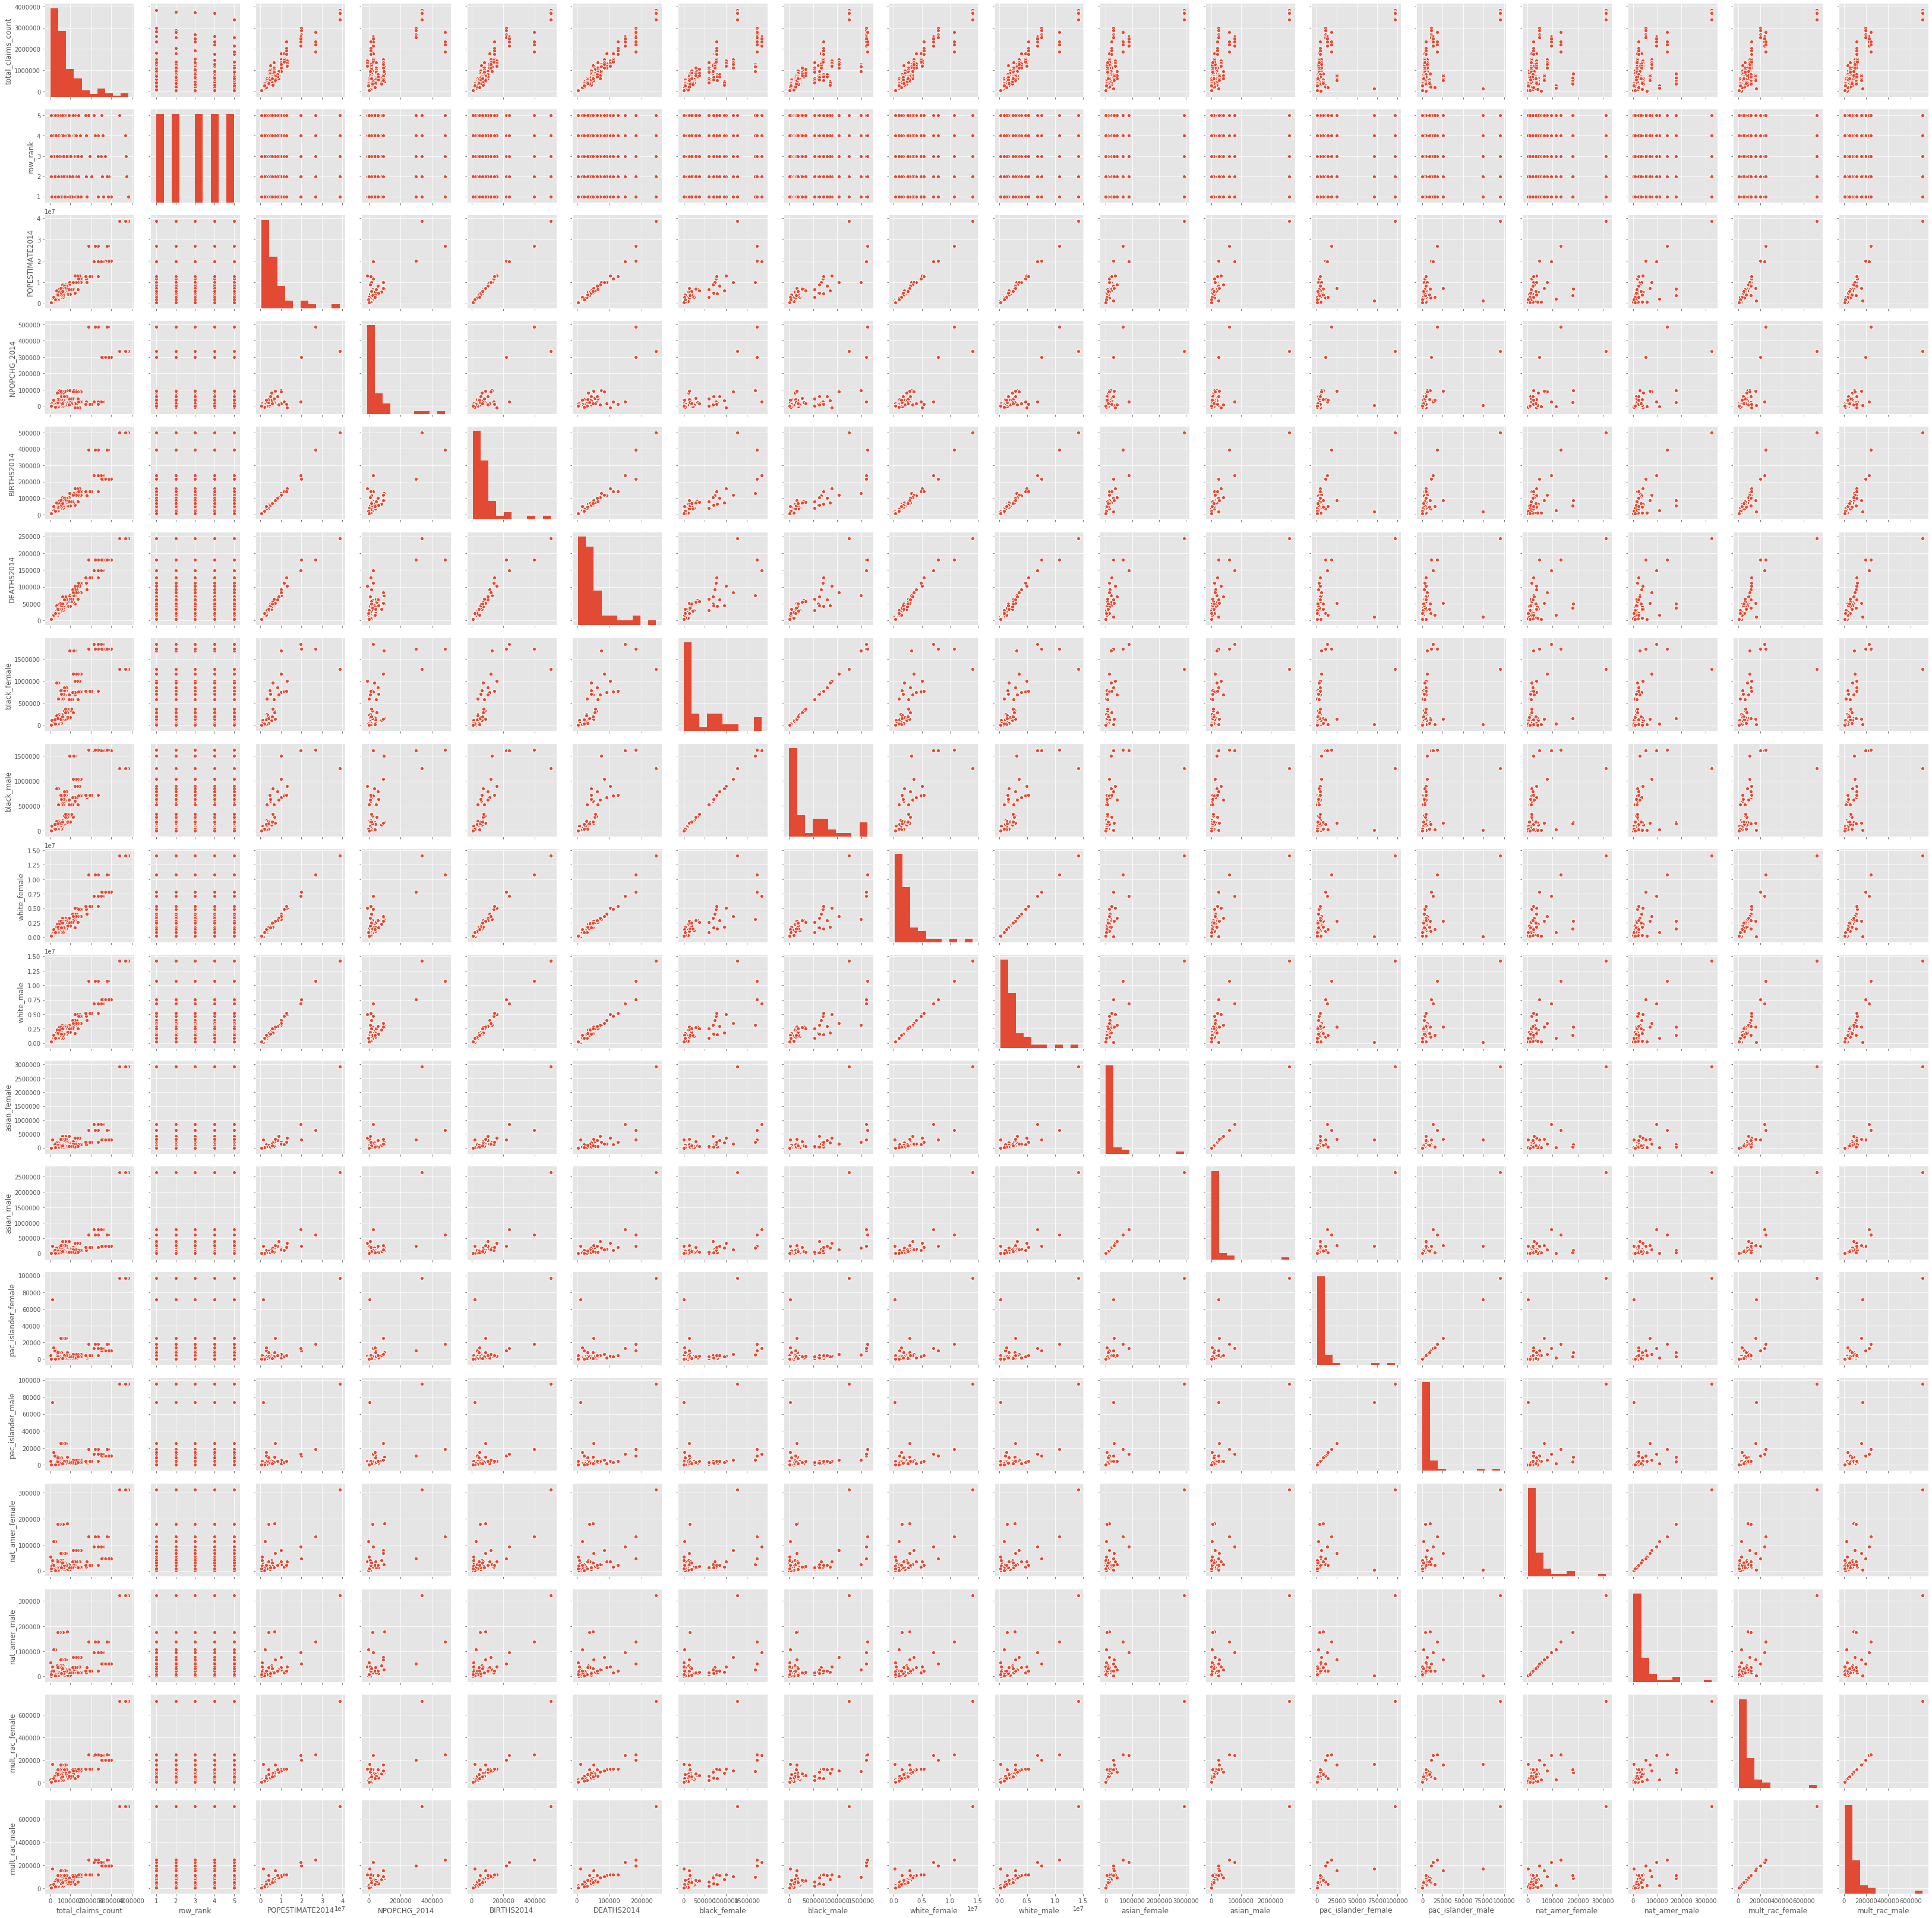

In [116]:
#Prelimnary look at relationships
sns.pairplot(clean_consol_2014_df)

In [117]:
clean_consol_2014_df.columns

Index(['drug_name', 'state', 'total_claims_count', 'row_rank', 'REGION_name',
       'DIVISION_name', 'POPESTIMATE2014', 'NPOPCHG_2014', 'BIRTHS2014',
       'DEATHS2014', 'black_female', 'black_male', 'white_female',
       'white_male', 'asian_female', 'asian_male', 'pac_islander_female',
       'pac_islander_male', 'nat_amer_female', 'nat_amer_male',
       'mult_rac_female', 'mult_rac_male'],
      dtype='object')

In [171]:
clean_consol_2014_df

,drug_name,state,total_claims_count,row_rank,REGION_name,DIVISION_name,POPESTIMATE2014,NPOPCHG_2014,BIRTHS2014,DEATHS2014,...,white_female,white_male,asian_female,asian_male,pac_islander_female,pac_islander_male,nat_amer_female,nat_amer_male,mult_rac_female,mult_rac_male
0,LISINOPRIL,AK,47684,1,West,Pacific,736283,-785,11443,4024,...,230568,261562,23207,21202,4528,4661,54854,56531,25871,26327
1,LEVOTHYROXINE SODIUM,AK,34082,2,West,Pacific,736283,-785,11443,4024,...,230568,261562,23207,21202,4528,4661,54854,56531,25871,26327
2,OMEPRAZOLE,AK,33574,3,West,Pacific,736283,-785,11443,4024,...,230568,261562,23207,21202,4528,4661,54854,56531,25871,26327
3,HYDROCODONE/ACETAMINOPHEN,AK,28442,4,West,Pacific,736283,-785,11443,4024,...,230568,261562,23207,21202,4528,4661,54854,56531,25871,26327
4,SIMVASTATIN,AK,28115,5,West,Pacific,736283,-785,11443,4024,...,230568,261562,23207,21202,4528,4661,54854,56531,25871,26327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,LEVOTHYROXINE SODIUM,WY,78676,1,West,Mountain,582531,409,7714,4527,...,265385,276343,2967,2445,266,301,7747,7960,5582,5693
246,LISINOPRIL,WY,51226,2,West,Mountain,582531,409,7714,4527,...,265385,276343,2967,2445,266,301,7747,7960,5582,5693
247,SIMVASTATIN,WY,44117,3,West,Mountain,582531,409,7714,4527,...,265385,276343,2967,2445,266,301,7747,7960,5582,5693
248,OMEPRAZOLE,WY,41966,4,West,Mountain,582531,409,7714,4527,...,265385,276343,2967,2445,266,301,7747,7960,5582,5693


In [165]:
#I want to see if there is a correlation between population size and drug claims 
#First ill get all the populations of the states again
state_pop_df = clean_consol_2014_df[['state','drug_name','POPESTIMATE2014', 'total_claims_count']].groupby('state').max()

In [167]:
state_pop_df.head()

,drug_name,POPESTIMATE2014,total_claims_count
state,,,
AK,SIMVASTATIN,736283,47684
AL,OMEPRAZOLE,4841799,1214392
AR,OMEPRAZOLE,2967392,587738
AZ,SIMVASTATIN,6730413,866240
CA,SIMVASTATIN,38596972,3844722


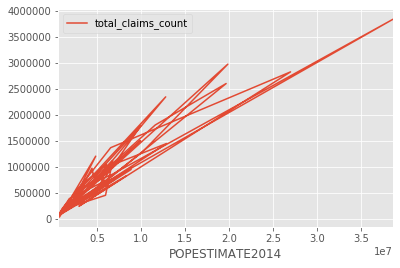

In [170]:
state_pop_df.plot(x='POPESTIMATE2014', y='total_claims_count')